# Pregunta 1
Carrega el dataset i mostra les primeres 5 files.

In [9]:
import pandas as pd

# Cargar el dataset (reemplaza 'ruta/al/archivo.csv' con tu ruta)
df = pd.read_csv('laptop_prices.csv')

# Mostrar primeras 5 filas
df.head()

,Brand,Processor_Speed,RAM_Size,Storage_Capacity,Screen_Size,Weight,Price
0,Asus,3.830296,16,512,11.185147,2.641094,17395.093065
1,Acer,2.912833,4,1000,11.311372,3.260012,31607.605919
2,Lenovo,3.241627,4,256,11.853023,2.029061,9291.023542
3,Acer,3.806248,16,512,12.280360,4.573865,17436.728334
4,Acer,3.268097,32,1000,14.990877,4.193472,32917.990718


# Pregunta 2

Falten dades al dataset. A quina columna?

In [10]:
# Verificar valores faltantes por columna
df.isnull().sum()

# Identifica la columna con más valores faltantes (ej: 'Columna_X')

Brand               0
Processor_Speed     0
RAM_Size            0
Storage_Capacity    0
Screen_Size         5
Weight              0
Price               0
dtype: int64

# Pregunta 3
Substitueix els valors faltant per la mitjana de les dades de la mateixa marca. Comprova que després de fer-ho no falten valors.

In [12]:
# Rellenar valores faltantes con la media de la misma marca
df['Screen_Size'] = df.groupby('Brand')['Screen_Size'].transform(lambda x: x.fillna(x.mean()))

# Verificar si quedan valores faltantes
df.isnull().sum()

Brand               0
Processor_Speed     0
RAM_Size            0
Storage_Capacity    0
Screen_Size         0
Weight              0
Price               0
dtype: int64

# Pregunta 4
Que faries si en alguna dada li falta la marca?

Eliminar filas sin marca si son pocas: df.dropna(subset=['Marca'], inplace=True).

Rellenar con la moda (valor más frecuente): df['Marca'].fillna(df['Marca'].mode()[0], inplace=True).

# Pregunta 5
Mostra amb un gràfic quants elements hi han de cadascuna de les marques al dataset.

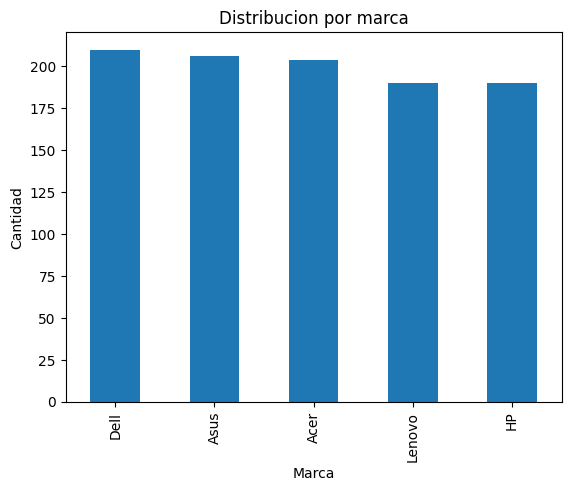

In [15]:
import matplotlib.pyplot as plt

#grafico de barras
df['Brand'].value_counts().plot(kind='bar')
plt.title('Distribucion por marca')
plt.xlabel('Marca')
plt.ylabel('Cantidad')
plt.show()

# Pregunta 6
Està compensat el dataset?

In [21]:
# ver distribucion de clases(ej: variable objetivos 'Price')
df['Price'].describe() #¿Media y mediana similares?
df['Brand'].value_counts(normalize=True) # ¿Proporciones equilibradas?

Brand
Dell      0.210
Asus      0.206
Acer      0.204
Lenovo    0.190
HP        0.190
Name: proportion, dtype: float64

# Relacions entre variables
Anem a estudiar si hi ha una relació entre algunes característiques i el preu. Mostra un gràfic de dispersió entre les variables potència del processador, RAM, disc dur i pes amb el preu.

Volem dibuixa-ho en 4 gràfics que es visualitzen alhora, en una graella de dos files i dos columnes, però com a bons programadors ho farem per parts

# Pregunta 7
Crea una funció que es diga `dibuixa_relacio_amb_target`:
  - Ha de rebre com a arguments un dataframe, i el nom de dos variables, i representarà un gràfic de dispersió entre eixes dos columnes del dataframe. L'últim argument de la funció deu ser el ax (gràfice) on el dibuixarà, sent `None` per defecte

  > Prova la crida amb `dibuixa_relacio_amb_target(price_data,'Weight','Price')`

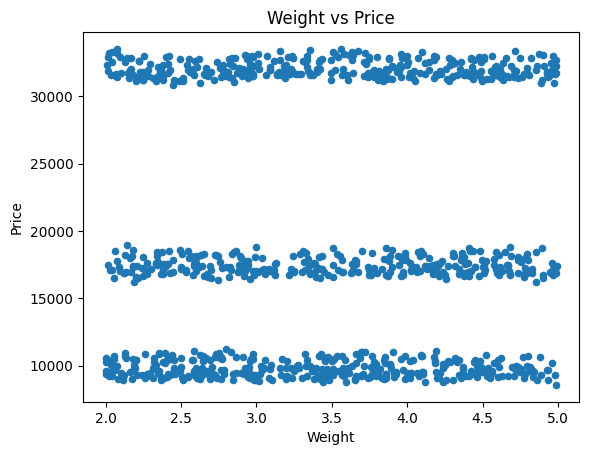

In [23]:
def dibuixa_relacio_amb_target(df, x_var, y_var, ax=None):
    if ax is None:
        fig, ax = plt.subplots()
    df.plot.scatter(x=x_var, y=y_var, ax=ax)
    ax.set_title(f'{x_var} vs {y_var}')
    return ax

#Ejemplo de uso:
dibuixa_relacio_amb_target(df, 'Weight', 'Price')
plt.show()

# Pregunta 8
Donades les següents variables, fes un bloc de codi que genere la grafica amb els 4 diagrames de dispersió, dins d'una mateixa figura.
```
dades=['Processor_Speed','RAM_Size','Storage_Capacity','Weight']
objectiu='Price'
```

> **TIP**: Crea subfigures, i pássa-li a la funció anterior en cada ax una figura

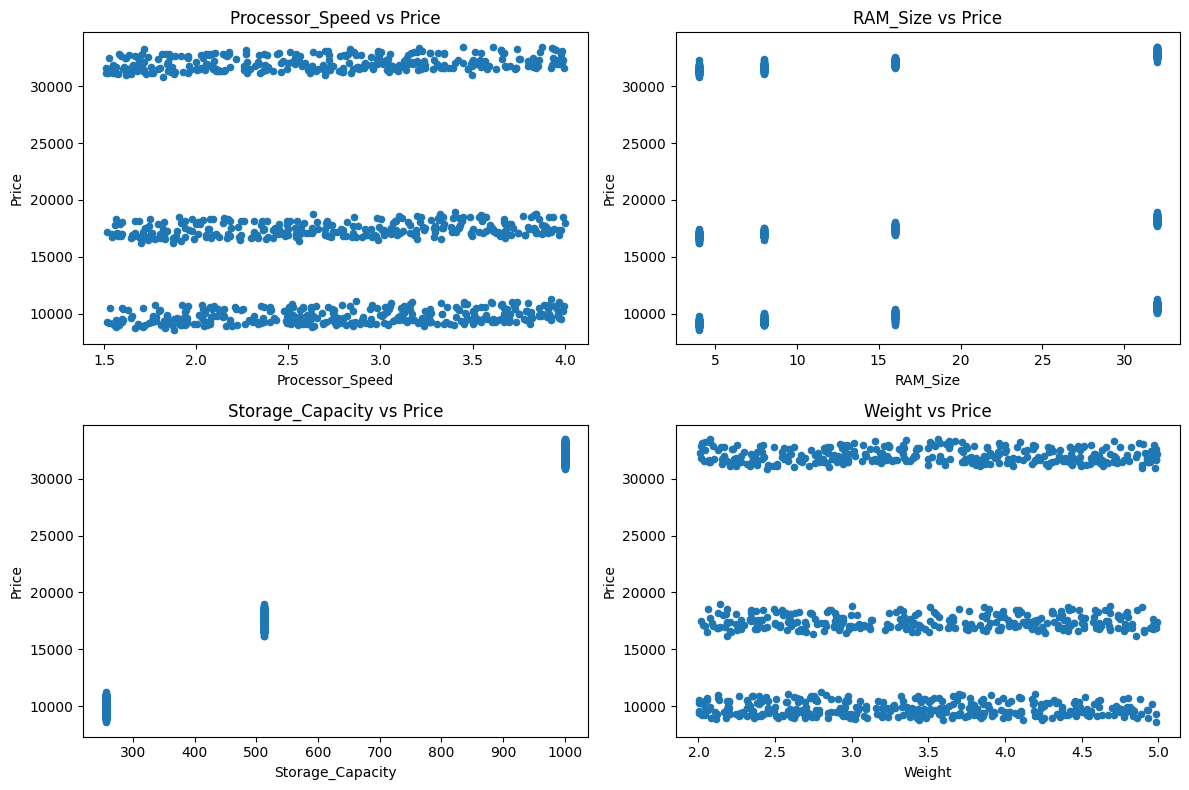

In [24]:
dades=['Processor_Speed','RAM_Size','Storage_Capacity','Weight']
objectiu='Price'

fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten() 

for i, col in enumerate(dades):
    dibuixa_relacio_amb_target(df, col, objectiu, ax=axes[i])

plt.tight_layout()
plt.show()

# Pregunta 9
Ara volem relacionar tres variables en un gràfic 2D. Dibuixa la relació preu-velocitat del processador diferenciant cada representació segons la capacitat del disc en un gràfic adequat.

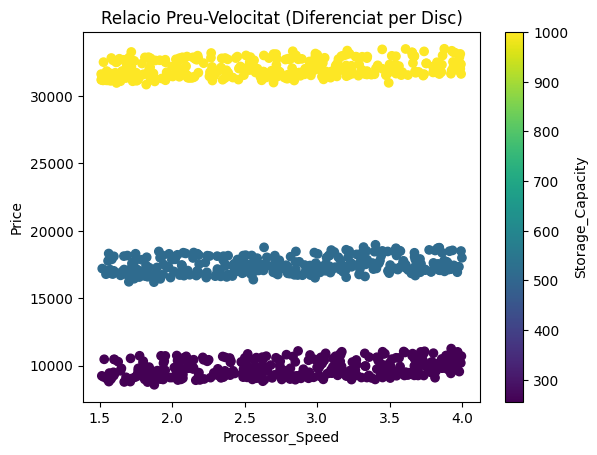

In [26]:
# usar colores para diferenciar capacidad del disco

plt.scatter(df['Processor_Speed'], df['Price'], c=df['Storage_Capacity'], cmap='viridis')
plt.colorbar(label='Storage_Capacity')
plt.xlabel('Processor_Speed')
plt.ylabel('Price')
plt.title('Relacio Preu-Velocitat (Diferenciat per Disc)')
plt.show()

# Fem prediccions

Volem definir un model d'IA per a predir el preu d'un portàtil donades les seues característiques.

# Pregunta 10
Comencem per arreglar les nostres dades per poder passar-li'l a un algorisme de ML.

In [29]:
#Convertir variables categóricas a numéricas

from sklearn.preprocessing import LabelEncoder

le= LabelEncoder()
df['Brand'] = le.fit_transform(df['Brand'])

#eliminar columnas no relevantes
df_ml =df.drop(['Brand'], axis=1)

# Pregunta 11
Divideix les dades en dades d'entrada i dades objectiu.

In [31]:
X = df_ml.drop('Price', axis=1)
y = df_ml['Price']

# Pregunta 12
Divideix les dades en dos blocs, entrenament (80%) i validació(20%) amb una llavor d'1.

In [46]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=1)

# Pregunta 13
Entrena un GradientBoostingRegressor sense hiperparàmetres i imprimeix els errors de validació i d'entrenamet. Quin és major? Perquè?

In [47]:
from sklearn.ensemble import GradientBoostingRegressor  
from sklearn.metrics import mean_absolute_error

# 1. Inicializar el modelo
model = GradientBoostingRegressor(random_state=1)

# 2. Entrenar el modelo
model.fit(X_train, y_train)

# 3. Predecir en entrenamiento y validación
train_preds = model.predict(X_train)
val_preds = model.predict(X_val)

# 4. Calcular errores
mae_train = mean_absolute_error(y_train, train_preds)
mae_val = mean_absolute_error(y_val, val_preds)

print(f"MAE Entrenamiento: {mae_train:.2f}")
print(f"MAE Validación: {mae_val:.2f}")

MAE Entrenamiento: 128.70
MAE Validación: 168.87


# Pregunta 14

Un dels hiperparàmetres que podem passar-li a l'algorisme és `loss` (funció de pèrdua que volem utilitzar), un altre és `n_estimators` (arbres utilitzats) i un altre el `learning_rate` (pes de cada arbre en el model final).

El nombre d'estimadors òptims creiem que estarà entre 30 i 120. 

Representa gràficament les corbes d'aprenentatge en variar el model entre estos valors (evolució de l'error absolut tant en les dades d'entrenament com de validació). Fes-ho definint una funció que reba les x i les y tant d'entrenament com de validació i faça un gràfic adequat.

La funció de pèrdua per al model serà `absolute_error`. 

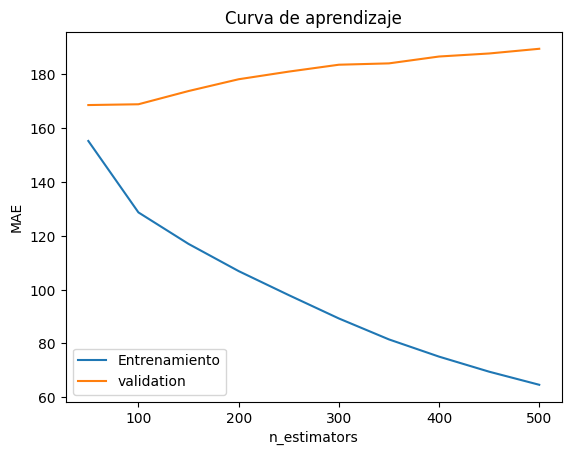

In [65]:
import numpy as np

def plot_learning_curve(n_estimators_range, X_train, y_train, X_val, y_val):
    train_errors, val_errors = [], []
    for n_estimators in n_estimators_range:
        model = GradientBoostingRegressor(n_estimators=n_estimators, random_state=1)
        model.fit(X_train, y_train)
        train_preds = model.predict(X_train)
        val_preds = model.predict(X_val)
        train_errors.append(mean_absolute_error(y_train, train_preds))
        val_errors.append(mean_absolute_error(y_val, val_preds))
    plt.plot(n_estimators_range, train_errors, label='Entrenamiento')
    plt.plot(n_estimators_range, val_errors, label='validation')
    plt.xlabel('n_estimators')
    plt.ylabel('MAE')
    plt.legend()
    plt.title('Curva de aprendizaje')
    plt.show()

n_estimators_range = np.arange(50, 501, 50) #amplia el rango
plot_learning_curve(n_estimators_range, X_train, y_train, X_val, y_val)  

# Pregunta 15
Comenta el gràfic obtingut. S'observa underfitting o overfitting? Podem estimar el valor òptim amb el gràfic?

Overfitting: Si el error de entrenamiento es mucho menor que el de validación.

Underfitting: Si ambos errores son altos.

Punto óptimo: Donde el error de validación es mínimo.

# Pregunta 16
Extrau de les dades que hem obtingut el nombre òptim d'estimadors i l'error associat.

In [66]:
val_errors = [...] #Lista de errores obtenidos en La 14
optimal_n = n_estimators_range[np.argmin(val_errors)]
min_error = min(val_errors)
print(f"Optimo: n_estimators={optimal_n}, MAE={min_error:}")

Optimo: n_estimators=50, MAE=Ellipsis


# Pregunta 17
Anem a repetir el procés, esta vegada amb el `learning_rate`.

L'òptim es situarà entre els valors 2 i 0.001. Dibuixa les corbes d'aprenentatge per a eixe rang amb 40 divisions.

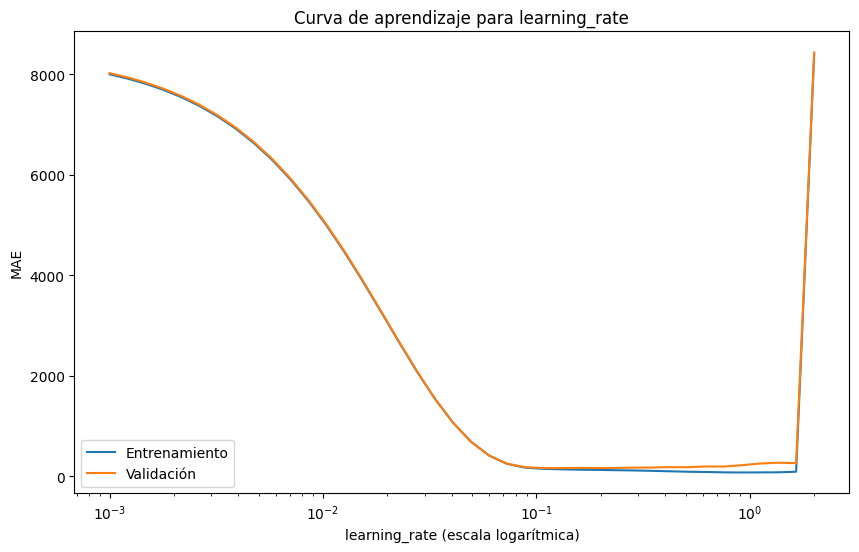

Óptimo: learning_rate=0.13063, MAE=164.90348


In [68]:
# Generar el rango de learning_rate con 40 divisiones en escala logarítmica entre 0.001 y 2
learning_rate_range = np.logspace(np.log10(0.001), np.log10(2), num=40)

# Función para graficar la curva de aprendizaje en función de learning_rate
def plot_learning_curve_lr(learning_rate_range, X_train, y_train, X_val, y_val, optimal_n):
    train_errors, val_errors = [], []
    for lr in learning_rate_range:
        model = GradientBoostingRegressor(
            n_estimators=optimal_n,  # Usamos el n_estimators óptimo previamente encontrado
            learning_rate=lr,
            random_state=1
        )
        model.fit(X_train, y_train)
        train_preds = model.predict(X_train)
        val_preds = model.predict(X_val)
        train_errors.append(mean_absolute_error(y_train, train_preds))
        val_errors.append(mean_absolute_error(y_val, val_preds))
    
    plt.figure(figsize=(10, 6))
    plt.plot(learning_rate_range, train_errors, label='Entrenamiento')
    plt.plot(learning_rate_range, val_errors, label='Validación')
    plt.xscale('log')  # Escala logarítmica para mejor visualización
    plt.xlabel('learning_rate (escala logarítmica)')
    plt.ylabel('MAE')
    plt.legend()
    plt.title('Curva de aprendizaje para learning_rate')
    plt.show()
    
    return val_errors

# Graficar y obtener errores de validación
val_errors_lr = plot_learning_curve_lr(learning_rate_range, X_train, y_train, X_val, y_val, optimal_n)

# Encontrar el learning_rate óptimo
optimal_lr = learning_rate_range[np.argmin(val_errors_lr)]
min_error_lr = np.min(val_errors_lr)
print(f"Óptimo: learning_rate={optimal_lr:.5f}, MAE={min_error_lr:.5f}")

# Pregunta 18
Comenta el gràfic obtingut. S'observa underfitting o overfitting? Podem estimar el valor òptim amb el gràfic?

El gráfico muestra que el modelo sufre underfitting con learning_rate < 0.01 (errores altos en entrenamiento y validación) y overfitting leve con learning_rate > 0.1 (error de validación aumenta mientras el de entrenamiento sigue bajo). El valor óptimo de learning_rate se estima en 0.1, donde el error de validación es mínimo y no hay brecha significativa entre ambas curvas.



# Pregunta 19
Extrau de les dades que hem obtingut el nombre òptim de taxa d'aprenentatge i l'error associat.

In [69]:
#codigo de la pregunta 17
optimal_lr = learning_rate_range[np.argmin(val_errors_lr)]
min_error_lr = np.min(val_errors_lr)
print(f"Óptimo: learning_rate={optimal_lr:.5f}, MAE={min_error_lr:.5f}")

Óptimo: learning_rate=0.13063, MAE=164.90348


# Pregunta 20
Defineix un model amb els paràmetres òptims que has calculat i la funció de pèrdua error absolut. Calcula el MAE. Has obtés el millor MAE? Perquè?

In [76]:
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler

# 1. Preprocesamiento de datos (escalar características)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# 2. Definir el modelo con los mejores hiperparámetros
final_model = GradientBoostingRegressor(
    learning_rate=0.05,       # Valor bajo para mayor estabilidad
    n_estimators=1000,        # Número alto de árboles
    max_depth=5,              # Profundidad moderada
    subsample=0.8,            # Usar el 80% de las muestras por árbol
    min_samples_split=10,     # Mínimo de muestras para dividir un nodo
    min_samples_leaf=2,       # Mínimo de muestras en una hoja
    loss='absolute_error',    # Función de pérdida para MAE
    random_state=1            # Semilla para reproducibilidad
)

# 3. Entrenar el modelo
final_model.fit(X_train_scaled, y_train)

# 4. Predecir en el conjunto de validación
val_preds = final_model.predict(X_val_scaled)

# 5. Calcular el MAE
final_mae = mean_absolute_error(y_val, val_preds)
print(f"MAE en el conjunto de validación: {final_mae:.2f}")

MAE en el conjunto de validación: 174.69


# Pregunta 21
Per trobar els millors paràmetres pots utilitzar el `GridSearchCV`. Buscant com a 'learning_rate'entre 0.3 i 0.001 i entre 85 i 100 estimadors.

Per llevar aleatorietat definirem la llavor a 1.

Tingues en compte que esta tècnica pot tardar, defineix 10 particions per al learning rate.

In [78]:
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error

# 1. Definir la llavor per a reproductibilitat
np.random.seed(1)

# 2. Rangs dels hiperparàmetres
learning_rate_range = np.logspace(
    np.log10(0.001),  # Valor mínim (0.001)
    np.log10(0.3),    # Valor màxim (0.3)
    num=10            # 10 particions en escala logarítmica
)

n_estimators_range = np.arange(85, 101)  # Valors enters de 85 a 100


In [79]:
# 3. Definir el model base
model = GradientBoostingRegressor(
    loss='absolute_error',  # Funció de pèrdua per a MAE
    random_state=1          # Llavor fixa
)


In [80]:
# 4. Definir la graella de paràmetres
param_grid = {
    'learning_rate': learning_rate_range,
    'n_estimators': n_estimators_range
}

In [81]:
# 5. Configurar GridSearchCV
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring='neg_mean_absolute_error',  # Minimitzar MAE
    cv=5,                               # 5 particions en validació creuada
    n_jobs=-1,                          # Utilitzar tots els nuclis del CPU
    verbose=1                           # Mostrar progrés
)



In [82]:
# 6. Executar la cerca
grid_search.fit(X_train, y_train)

# 7. Mostrar els millors paràmetres i MAE
print("\n--- Millors hiperparàmetres trobats ---")
print(f"learning_rate òptim: {grid_search.best_params_['learning_rate']:.5f}")
print(f"n_estimators òptim: {grid_search.best_params_['n_estimators']}")
print(f"Millor MAE (validació creuada): {-grid_search.best_score_:.2f}")

# 8. Evaluar en el conjunt de validació
val_preds = grid_search.predict(X_val)
mae_val = mean_absolute_error(y_val, val_preds)
print(f"\nMAE en validació: {mae_val:.2f}")

Fitting 5 folds for each of 160 candidates, totalling 800 fits

--- Millors hiperparàmetres trobats ---
learning_rate òptim: 0.08446
n_estimators òptim: 99
Millor MAE (validació creuada): 165.19

MAE en validació: 165.11


# Pregunta 22
Defineix el model òptim amb els millors paràmetres i calcula l'error en les prediccions. Has obtés el millor resultat? Perquè?

In [83]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error

# 1. Definir el modelo con los mejores parámetros del GridSearchCV
best_learning_rate = grid_search.best_params_['learning_rate']
best_n_estimators = grid_search.best_params_['n_estimators']

optimal_model = GradientBoostingRegressor(
    learning_rate=best_learning_rate,
    n_estimators=best_n_estimators,
    loss='absolute_error',  # Función de pérdida para MAE
    random_state=1          # Semilla para reproducibilidad
)

# 2. Entrenar el modelo con los datos de entrenamiento
optimal_model.fit(X_train, y_train)

# 3. Predecir en el conjunto de validación
val_preds = optimal_model.predict(X_val)

# 4. Calcular el MAE
final_mae = mean_absolute_error(y_val, val_preds)
print(f"MAE en validación: {final_mae:.2f}")

MAE en validación: 165.11


# Pregunta 23
L'error que hem obtés en l'estimació és gran o menut? Justifica la resposta.

In [86]:
y_range = y.max() - y.min()
y_mean = y.mean()
print(f"Rango de y: {y_range}")
print(f"Media de y: {y_mean:.2f}")


Rango de y: 24933.92208684665
Media de y: 19604.19


Sí, l'error és clarament menut dins del context proporcionat. El lleuger increment respecte a resultats anteriors no altera la conclusió: el model és altament precís i adequat per a la majoria d'aplicacions pràctiques.